In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()
from matplotlib import style
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
# plt.style.use('fivethirtyeight')
plt.style.use(['ggplot'])
%config IPCompleter.greedy=True
from IPython.display import display
from IPython.display import Image

In [4]:
def makeDataFrame(jsonData):
    listOfId=[]
    listOfGenre=[]
    for i in jsonData['items']:
        listOfId.append(i['id'])
        listOfGenre.append(i['snippet']['title'])

    genreIds={}
    genreIds['id']=listOfId
    genreIds['Genre']=listOfGenre
    genreDf=pd.DataFrame.from_dict(genreIds)
    return genreDf

In [5]:
uk_json = pd.read_json("GB_category_id.json", orient='columns', typ='frame', dtype=True, convert_axes=True,)

In [6]:
genre = makeDataFrame(uk_json)

In [7]:
genre = genre.reset_index(drop = True)

#### How to append categories to dataframe based on id

In [8]:
GB_csv = pd.read_csv("GBvideos.csv")

In [9]:
#rename category_id to id
GB_youtube_df = GB_csv.rename(columns={'category_id': 'id'})

In [10]:
GB_youtube_df.head(1)

video_id trending_date                                          title  \
0  Jw1Y-zhQURU      17.14.11  John Lewis Christmas Ad 2017 - #MozTheMonster   

  channel_title  id              publish_time  \
0    John Lewis  26  2017-11-10T07:38:29.000Z   

                                                tags    views  likes  \
0  christmas|"john lewis christmas"|"john lewis"|...  7224515  55681   

   dislikes  comment_count                                  thumbnail_link  \
0     10247           9479  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   

                                         description  
0  Click here to continue the story and make your...

In [11]:
GB_youtube_df['id'].dtype

dtype('int64')

In [12]:
genre['id'].dtype

dtype('O')

In [13]:
#Need to cast both id's to the same type
genre['id'] = genre['id'].astype(int)

In [14]:
GB_concat = pd.merge(GB_youtube_df, genre, on=['id'],how='left')

GB_concat

* `  Bar plots `


* `Analysis to visualise views/comment_count/likes/dislikes based on genre id`

### GB genre analysis

In [16]:
youtube_genre = GB_concat['Genre']

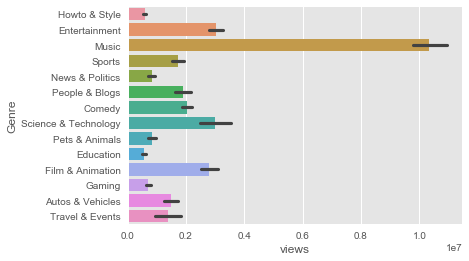

In [17]:
sns.barplot(y=youtube_genre, x=GB_concat['views'])

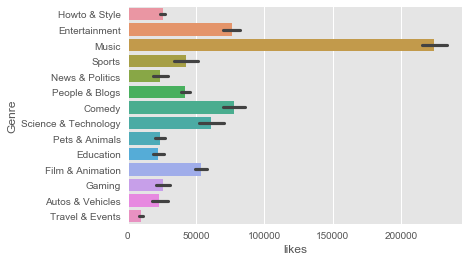

In [18]:
sns.barplot(x=GB_concat['likes'], y=youtube_genre)

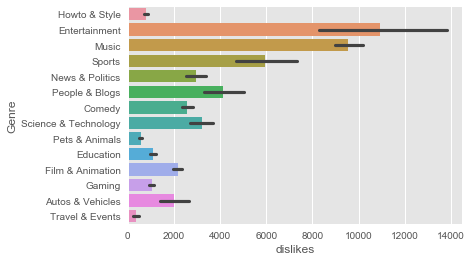

In [19]:
sns.barplot(y=youtube_genre, x=GB_concat['dislikes'])

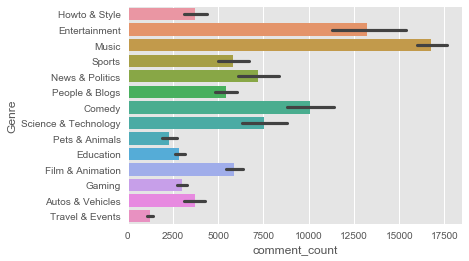

In [20]:
sns.barplot(y=youtube_genre, x=GB_concat['comment_count'])

In [21]:
#sns.countplot(x=GB_concat['comment_count'], hue=youtube_genre)

### US genre analysis

In [22]:
US_csv = pd.read_csv("USvideos.csv")

In [23]:
US_json = pd.read_json("US_category_id.json", orient='columns', typ='frame', dtype=True, convert_axes=True,)

In [24]:
#rename category_id to id
US_csv_df = US_csv.rename(columns={'category_id': 'id'})

In [25]:
genre = makeDataFrame(US_json)

In [26]:
#Need to cast both id's to the same type
genre['id'] = genre['id'].astype(int)

In [27]:
#US_concat = pd.concat([US_csv_df, genre],axis=1)
US_concat = pd.merge(US_csv_df, genre, on=['id'],how='left')

US_concat

In [31]:
US_concat.shape

(28750, 17)

In [27]:
US_genre = US_concat['Genre']

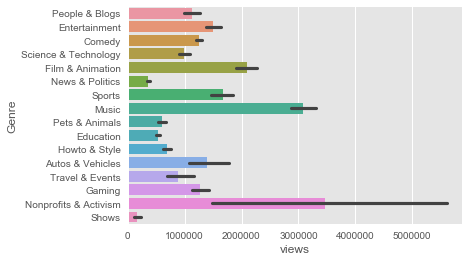

In [28]:
sns.barplot(y=US_genre, x=US_concat['views'])

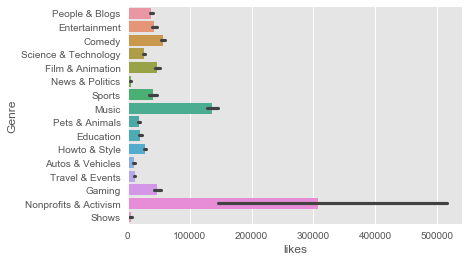

In [29]:
sns.barplot(y=US_genre, x=US_concat['likes'])

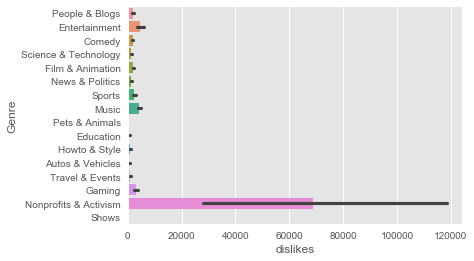

In [30]:
sns.barplot(y=US_genre, x=US_concat['dislikes'])

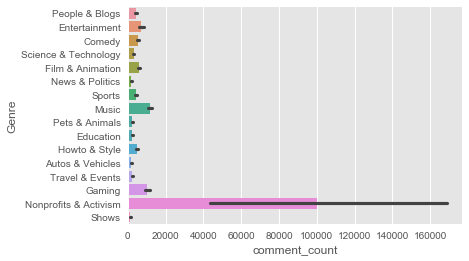

In [31]:
sns.barplot(y=US_genre, x=US_concat['comment_count'])

### Canada genre analysis

In [32]:
CA_csv = pd.read_csv("CAvideos.csv")

In [33]:
CA_json = pd.read_json("CA_category_id.json", orient='columns', typ='frame', dtype=True, convert_axes=True,)

In [34]:
#rename category_id to id
CA_csv_df = CA_csv.rename(columns={'category_id': 'id'})

In [35]:
genre = makeDataFrame(CA_json)

In [36]:
#Need to cast both id's to the same type
genre['id'] = genre['id'].astype(int)

In [37]:
CA_concat = pd.merge(CA_csv_df, genre, on=['id'],how='left')

CA_concat.head()

In [39]:
CA_genre = CA_concat['Genre']

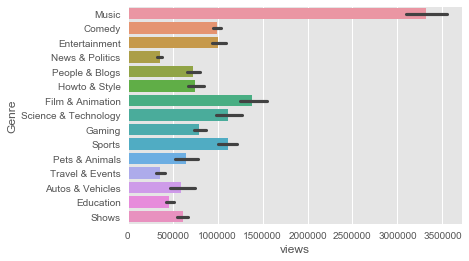

In [40]:
sns.barplot(y=CA_genre, x=CA_concat['views'])

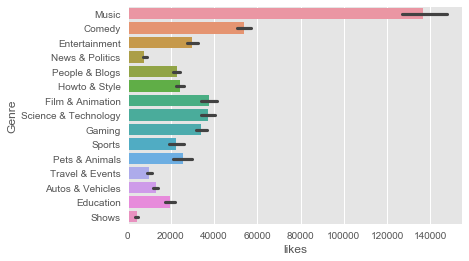

In [41]:
sns.barplot(y=CA_genre, x=CA_concat['likes'])

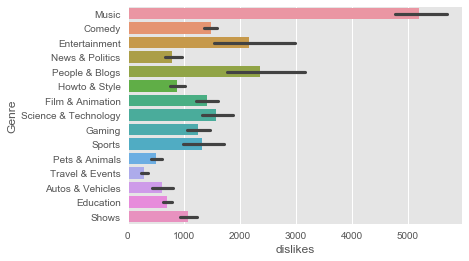

In [42]:
sns.barplot(y=CA_genre, x=CA_concat['dislikes'])

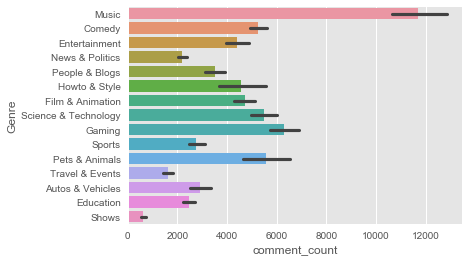

In [43]:
sns.barplot(y=CA_genre, x=CA_concat['comment_count'])

### Germany genre analysis

In [44]:
DE_csv = pd.read_csv("DEvideos.csv")

In [45]:
DE_json = pd.read_json("DE_category_id.json", orient='columns', typ='frame', dtype=True, convert_axes=True,)

In [46]:
#rename category_id to id
DE_csv_df = DE_csv.rename(columns={'category_id': 'id'})

In [47]:
genre = makeDataFrame(DE_json)

In [48]:
genre.dtypes

Genre    object
id       object
dtype: object

In [49]:
#Need to cast both id's to the same type
genre['id'] = genre['id'].astype(int)

In [50]:
DE_concat = pd.merge(DE_csv_df, genre, on=['id'],how='left')

DE_concat.head()

In [52]:
DE_genre = CA_concat['Genre']

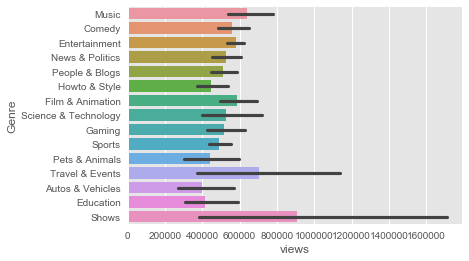

In [53]:
sns.barplot(y=DE_genre, x=DE_concat['views'])

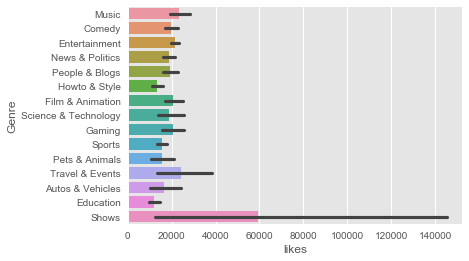

In [54]:
sns.barplot(y=DE_genre, x=DE_concat['likes'])

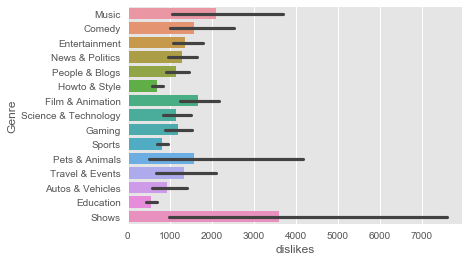

In [55]:
sns.barplot(y=DE_genre, x=DE_concat['dislikes'])

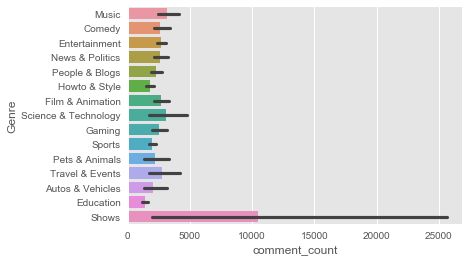

In [56]:
sns.barplot(y=DE_genre, x=DE_concat['comment_count'])

### France genre analysis

In [57]:
FR_csv = pd.read_csv("FRvideos.csv")

In [58]:
FR_csv.head(1)

video_id trending_date                                     title  \
0  Ro6eob0LrCY      17.14.11  Malika LePen : Femme de Gauche - Trailer   

         channel_title  category_id              publish_time  \
0  Le Raptor Dissident           24  2017-11-13T17:32:55.000Z   

                                                tags   views  likes dislikes  \
0  Raptor|"Dissident"|"Expliquez"|"moi"|"cette"|"...  212702  29282     1108   

   comment_count                                  thumbnail_link  \
0         3817.0  https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg   

  comments_disabled ratings_disabled video_error_or_removed  \
0             False            False                  False   

                                         description  
0  Dimanche.\n18h30.\nSoyez présents pour la vidé...

In [59]:
FR_json = pd.read_json("FR_category_id.json", orient='columns', typ='frame', dtype=True, convert_axes=True,)

In [60]:
#rename category_id to id
FR_csv_df = FR_csv.rename(columns={'category_id': 'id'})

In [61]:
FR_genre = makeDataFrame(FR_json)

In [62]:
#Need to cast both id's to the same type
FR_genre['id'] = FR_genre['id'].astype(int)

In [63]:
FR_genre['id'].dtypes

dtype('int64')

In [64]:
FR_concat = pd.merge(FR_csv_df, FR_genre, on=['id'],how='left')

In [65]:
#FR_concat = pd.concat([FR_csv_df, genre],axis=1)

FR_concat.head()

In [67]:
FR_concat.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
id                          int64
publish_time               object
tags                       object
views                      object
likes                      object
dislikes                   object
comment_count             float64
thumbnail_link             object
comments_disabled          object
ratings_disabled           object
video_error_or_removed     object
description                object
Genre                      object
dtype: object

In [68]:
#sns.barplot(y=FR_genre, x=FR_concat['views'])

### Concatenate all files into one large csv

In [82]:
GB_US_concat = pd.concat([GB_concat,US_concat], axis=0)
#vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)

In [83]:
GB_US_CA_concat = pd.concat([GB_US_concat,CA_concat],axis=0)

In [84]:
GB_US_CA_DE_concat = pd.concat([GB_US_CA_concat,DE_concat],axis=0)

GB_US_CA_DE_concat

In [88]:
GB_US_CA_DE_concat.shape

(114631, 17)

### Export to one large csv for group

In [103]:
GB_US_CA_DE_concat.to_csv("youtube_countries.csv")